Data Preparation

In [14]:
import pandas as pd

# Load and inspect the CSV file
image_urls = pd.read_csv('all_image_urls.csv')
print(image_urls.head())


  https://farm66.staticflickr.com/65535/33978196618_632623b4fc_z.jpg  \
0  https://farm66.staticflickr.com/65535/47803331...                   
1  https://farm66.staticflickr.com/65535/40888872...                   
2  https://farm66.staticflickr.com/65535/47803331...                   
3  https://farm66.staticflickr.com/65535/33978199...                   
4  https://farm66.staticflickr.com/65535/33978200...                   

  https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png  
0  https://farm66.staticflickr.com/65535/47803331...                  
1  https://farm66.staticflickr.com/65535/40888872...                  
2  https://farm66.staticflickr.com/65535/47803331...                  
3  https://farm66.staticflickr.com/65535/33978199...                  
4  https://farm66.staticflickr.com/65535/33978200...                  


In [15]:
import os
import requests
from tqdm import tqdm
import pandas as pd

# Load image URLs
image_urls = pd.read_csv('all_image_urls.csv')

# Get all URLs
urls = image_urls.values.flatten()

# Create a directory
os.makedirs('downloaded_images', exist_ok=True)

# Download images
for url in tqdm(urls):
    if pd.notnull(url):  # Check if the URL is not null
        image_name = os.path.join('downloaded_images', os.path.basename(url))
        if not os.path.exists(image_name):
            response = requests.get(url, stream=True)
            if response.status_code == 200:
                with open(image_name, 'wb') as f:
                    for chunk in response.iter_content(1024):
                        f.write(chunk)

print("All images downloaded.")


  8%|▊         | 717/9234 [05:07<1:00:49,  2.33it/s]


KeyboardInterrupt: 

Load Annotations and Create DataFrame

In [61]:
import json

# Load annotations
with open('annotations.json') as f:
    annotations = json.load(f)

# Extract unique class labels
categories = annotations['categories']
category_id_to_name = {category['id']: category['name'] for category in categories}
print("Category ID to Name Mapping:")
for id, name in category_id_to_name.items():
    print(f"{id}: {name}")

# Check number of unique labels 
labels = [item['category_id'] for item in annotations['annotations']]
unique_labels = set(labels)
print(f"\nTotal unique labels found: {len(unique_labels)}")
print("Unique labels and their counts:")
for label in unique_labels:
    print(f"{label} ({category_id_to_name[label]}): {labels.count(label)}")


Category ID to Name Mapping:
0: Aluminium foil
1: Battery
2: Aluminium blister pack
3: Carded blister pack
4: Other plastic bottle
5: Clear plastic bottle
6: Glass bottle
7: Plastic bottle cap
8: Metal bottle cap
9: Broken glass
10: Food Can
11: Aerosol
12: Drink can
13: Toilet tube
14: Other carton
15: Egg carton
16: Drink carton
17: Corrugated carton
18: Meal carton
19: Pizza box
20: Paper cup
21: Disposable plastic cup
22: Foam cup
23: Glass cup
24: Other plastic cup
25: Food waste
26: Glass jar
27: Plastic lid
28: Metal lid
29: Other plastic
30: Magazine paper
31: Tissues
32: Wrapping paper
33: Normal paper
34: Paper bag
35: Plastified paper bag
36: Plastic film
37: Six pack rings
38: Garbage bag
39: Other plastic wrapper
40: Single-use carrier bag
41: Polypropylene bag
42: Crisp packet
43: Spread tub
44: Tupperware
45: Disposable food container
46: Foam food container
47: Other plastic container
48: Plastic glooves
49: Plastic utensils
50: Pop tab
51: Rope & strings
52: Scrap meta

Data moved into batches

In [70]:
import json
import os
import shutil

# Load annotations
with open('annotations.json') as f:
    annotations = json.load(f)

# Prepare images directory
image_dir = 'downloaded_images/'
batch_dir = 'batches/'

if not os.path.exists(batch_dir):
    os.makedirs(batch_dir)

# Create batch 
for img in annotations['images']:
    batch_name = os.path.dirname(img['file_name'])
    batch_path = os.path.join(batch_dir, batch_name)
    if not os.path.exists(batch_path):
        os.makedirs(batch_path)

# Move images to batch
for img in annotations['images']:
    flickr_url = img['flickr_url']
    original_filename = flickr_url.split('/')[-1]
    original_path = os.path.join(image_dir, original_filename)
    batch_path = os.path.join(batch_dir, img['file_name'])

    if os.path.exists(original_path):
        shutil.move(original_path, batch_path)
        print(f"Moved {original_path} to {batch_path}")
    else:
        print(f"File not found: {original_path}")

print("Image separation completed.")


Moved downloaded_images/33978196618_e30a59e0a8_o.png to batches/batch_1/000006.jpg
Moved downloaded_images/47803331152_ee00755a2e_o.png to batches/batch_1/000008.jpg
Moved downloaded_images/40888872753_08ffb24902_o.png to batches/batch_1/000010.jpg
Moved downloaded_images/47803331492_0e1085ca55_o.png to batches/batch_1/000019.jpg
Moved downloaded_images/33978199868_88ee160849_o.png to batches/batch_1/000026.jpg
Moved downloaded_images/33978200068_c6eed416ac_o.png to batches/batch_1/000047.jpg
Moved downloaded_images/47803332212_af8cfa9704_o.png to batches/batch_1/000055.jpg
Moved downloaded_images/33978202498_effbca58ef_o.png to batches/batch_1/000001.jpg
Moved downloaded_images/47803335992_9c58683430_o.png to batches/batch_1/000005.jpg
Moved downloaded_images/47855505601_f75a430abc_o.png to batches/batch_1/000007.jpg
Moved downloaded_images/40888877173_855795c875_o.png to batches/batch_1/000012.jpg
Moved downloaded_images/47066066634_c50443ca0c_o.png to batches/batch_1/000014.jpg
Move

Data moved into batches unofficial

In [13]:
import json
import os
import shutil

# Load annotations
with open('annotations_unofficial.json') as f:
    annotations = json.load(f)

# images directory
image_dir = 'downloaded_images/'
batch_dir = 'unofficial_batches/'

if not os.path.exists(batch_dir):
    os.makedirs(batch_dir)

# Create batch 
for img in annotations['images']:
    batch_name = os.path.dirname(img['file_name'])
    batch_path = os.path.join(batch_dir, batch_name)
    if not os.path.exists(batch_path):
        os.makedirs(batch_path)

# Move images to batch
for img in annotations['images']:
    flickr_url = img['flickr_url']
    original_filename = flickr_url.split('/')[-1]
    original_path = os.path.join(image_dir, original_filename)
    batch_path = os.path.join(batch_dir, img['file_name'])

    if os.path.exists(original_path):
        shutil.move(original_path, batch_path)
        print(f"Moved {original_path} to {batch_path}")
    else:
        print(f"File not found: {original_path}")

print("Image separation completed.")


Moved downloaded_images/49042991957_4c884f303a_o.png to unofficial_batches/unofficial/000000.jpg
Moved downloaded_images/49042714631_f8123b11ce_o.png to unofficial_batches/unofficial/000001.jpg
Moved downloaded_images/ZGEyczsylHpxtQg4BZ20lIZwuYRKmrPUfAnTExY9.jpeg to unofficial_batches/unofficial/000002.jpg
Moved downloaded_images/WCGrgrqVxbuK5S8THiawXwv8hcXwc9CGbSNeYNFd.jpeg to unofficial_batches/unofficial/000003.jpg
Moved downloaded_images/bWpIxxjUtOM93pmoVlG90IqnULV9VPyCh9EZwOet.jpeg to unofficial_batches/unofficial/000004.jpg
Moved downloaded_images/fFl3bolj5A3LdXLDzT6oftzV6feYUaNyNHIwtB3D.jpeg to unofficial_batches/unofficial/000005.jpg
Moved downloaded_images/Ngb7nXjJw701CT6NLjNFprRzA2C26nbyq3zmaMcV.jpeg to unofficial_batches/unofficial/000006.jpg
Moved downloaded_images/49042641481_1d5e9d05f2_o.png to unofficial_batches/unofficial/000007.jpg
File not found: downloaded_images/51619481358_2b3006b969_o.png
Moved downloaded_images/LARpGai3xtM112CBubsfoPBkouNOYmPWiTL7xsV6.jpeg to uno

Official model

In [1]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

# Load annotations
with open('annotations.json') as f:
    annotations = json.load(f)

# Prepare data
base_image_dir = 'batches'
images = []
labels = []
missing_files = 0

# Create a mapping from image IDs to file names
image_id_to_file = {img['id']: img['file_name'] for img in annotations['images']}

# Define the fixed category list 
category_names = [
    "Aluminium foil", "Battery", "Aluminium blister pack", "Carded blister pack", 
    "Other plastic bottle", "Clear plastic bottle", "Glass bottle", "Plastic bottle cap", 
    "Metal bottle cap", "Broken glass", "Food Can", "Aerosol", "Drink can", "Toilet tube", 
    "Other carton", "Egg carton", "Drink carton", "Corrugated carton", "Meal carton", 
    "Pizza box", "Paper cup", "Disposable plastic cup", "Foam cup", "Glass cup", 
    "Other plastic cup", "Food waste", "Glass jar", "Plastic lid", "Metal lid", 
    "Other plastic", "Magazine paper", "Tissues", "Wrapping paper", "Normal paper",
    "Paper bag", "Plastic film", "Six pack rings", "Garbage bag", "Other plastic wrapper", 
    "Single-use carrier bag", "Polypropylene bag", "Crisp packet", "Spread tub", 
    "Tupperware", "Disposable food container", "Foam food container", 
    "Other plastic container", "Plastic gloves", "Plastic utensils", "Pop tab",
    "Rope & strings", "Scrap metal", "Shoe", "Squeezable tube", "Plastic straw", 
    "Paper straw", "Styrofoam piece", "Unlabeled litter", "Cigarette"
]

# Adjust number of classes to the length of category_names
num_classes = len(category_names)

# Load images corresponding labels
for annotation in annotations['annotations']:
    image_id = annotation['image_id']
    category_id = annotation['category_id']
    
    if image_id in image_id_to_file and category_id < num_classes:
        file_name = image_id_to_file[image_id]
        image_path = os.path.join(base_image_dir, file_name)
        
        if os.path.exists(image_path):
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))  
            images.append(image)
            labels.append(category_id)
        else:
            missing_files += 1
            print(f"File not found: {image_path}")
    else:
        missing_files += 1
        print(f"No mapping found for image_id: {image_id} or category_id: {category_id}")

print(f"Total images loaded: {len(images)}")
print(f"Total missing files: {missing_files}")

if len(images) == 0:
    raise ValueError("No images were loaded. Please check the file paths and mapping.")


valid_labels = list(range(num_classes))
filtered_images = []
filtered_labels = []

for img, lbl in zip(images, labels):
    if lbl in valid_labels:
        filtered_images.append(img)
        filtered_labels.append(lbl)

# Convert to numpy arrays
images = np.array(filtered_images) / 255.0  # Normalize images
labels = np.array(filtered_labels)

# Filter out classes with fewer than 2 samples
unique_labels, counts = np.unique(labels, return_counts=True)
valid_labels = unique_labels[counts >= 2]
filtered_images = []
filtered_labels = []

for img, lbl in zip(images, labels):
    if lbl in valid_labels:
        filtered_images.append(img)
        filtered_labels.append(lbl)

# unique labels after filtering
images = np.array(filtered_images)
labels = np.array(filtered_labels)
unique_labels_after_filtering = np.unique(labels)
num_classes = len(unique_labels_after_filtering)

print(f"Total images after filtering: {len(images)}")
print(f"Unique labels found after filtering: {unique_labels_after_filtering}")

# Display category names for unique labels
print("Valid Category ID to Name Mapping after filtering:")
for i in unique_labels_after_filtering:
    print(f"{i}: {category_names[i]}")


label_map = {label: idx for idx, label in enumerate(unique_labels_after_filtering)}
adjusted_labels = np.array([label_map[label] for label in labels])

# Split data
X_train, X_val, y_train, y_val = train_test_split(images, adjusted_labels, test_size=0.2, random_state=42)

# Check the shape of the dat
print(f"Shape of training data: {X_train.shape}, {y_train.shape}")
print(f"Shape of validation data: {X_val.shape}, {y_val.shape}")

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = datagen.flow(X_train, y_train, batch_size=32)
val_generator = ImageDataGenerator().flow(X_val, y_val, batch_size=32)

# Build the model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers[:-30]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting

# Multi-class classification
predictions = Dense(num_classes, activation='softmax')(x)
loss = 'sparse_categorical_crossentropy'

model = Model(inputs=base_model.input, outputs=predictions)

# Compile  model
model.compile(optimizer=Adam(learning_rate=0.0001), loss=loss, metrics=['accuracy'])

# Calculate class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator, 
    validation_data=val_generator, 
    epochs=50, 
    steps_per_epoch=len(X_train) // 32, 
    validation_steps=len(X_val) // 32,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights  
)

# Evaluate  model
val_predictions = model.predict(X_val)
val_predictions = np.argmax(val_predictions, axis=1)

precision = precision_score(y_val, val_predictions, average='macro')
recall = recall_score(y_val, val_predictions, average='macro')
f1 = f1_score(y_val, val_predictions, average='macro')

print(f'Validation Accuracy: {history.history["val_accuracy"][-1] * 100:.2f}%')
print(f'Validation Precision: {precision:.2f}')
print(f'Validation Recall: {recall:.2f}')
print(f'Validation F1 Score: {f1:.2f}')

# Save  model
model.save('my_model.keras')


No mapping found for image_id: 30 or category_id: 59
No mapping found for image_id: 50 or category_id: 59
No mapping found for image_id: 50 or category_id: 59
No mapping found for image_id: 54 or category_id: 59
No mapping found for image_id: 56 or category_id: 59
No mapping found for image_id: 57 or category_id: 59
No mapping found for image_id: 57 or category_id: 59
No mapping found for image_id: 57 or category_id: 59
No mapping found for image_id: 57 or category_id: 59
No mapping found for image_id: 57 or category_id: 59
No mapping found for image_id: 57 or category_id: 59
No mapping found for image_id: 60 or category_id: 59
No mapping found for image_id: 64 or category_id: 59
No mapping found for image_id: 64 or category_id: 59
No mapping found for image_id: 64 or category_id: 59
No mapping found for image_id: 64 or category_id: 59
No mapping found for image_id: 64 or category_id: 59
No mapping found for image_id: 64 or category_id: 59
No mapping found for image_id: 65 or category_

C:\Users\Nicho\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/102 ━━━━━━━━━━━━━━━━━━━━ 39s 331ms/step - accuracy: 0.0294 - loss: 4.1160 - val_accuracy: 0.0375 - val_loss: 3.8996 - learning_rate: 1.0000e-04
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0312 - loss: 3.4790 - val_accuracy: 0.0000e+00 - val_loss: 4.1586 - learning_rate: 1.0000e-04


C:\Users\Nicho\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 315ms/step - accuracy: 0.0499 - loss: 3.6495 - val_accuracy: 0.0525 - val_loss: 3.7985 - learning_rate: 1.0000e-04
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0625 - loss: 6.0800 - val_accuracy: 0.0417 - val_loss: 3.6100 - learning_rate: 1.0000e-04
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 318ms/step - accuracy: 0.0650 - loss: 3.5412 - val_accuracy: 0.0550 - val_loss: 3.7862 - learning_rate: 1.0000e-04
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1250 - loss: 2.8983 - val_accuracy: 0.0833 - val_loss: 3.5335 - learning_rate: 1.0000e-04
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 315ms/step - accuracy: 0.0907 - loss: 3.2224 - val_accuracy: 0.0700 - val_loss: 3.7241 - learning_rate: 1.0000e-04
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0938 - loss: 2.6975 - val_accuracy: 0.1250 - val_loss: 3.7866 - learning_rate: 1.0000e-04
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 311ms/step 

C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


unOfficial model

In [26]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall

# Load annotations
with open('annotations_unofficial.json') as f:
    annotations = json.load(f)

# Prepare data
base_image_dir = 'unofficial'
images = []
labels = []
missing_files = 0

# Create a mapping from image IDs to file names
image_id_to_file = {img['id']: img['file_name'] for img in annotations['images']}

# Define the fixed category list 
category_names = [
    "Aluminium foil", "Battery", "Aluminium blister pack", "Carded blister pack", 
    "Other plastic bottle", "Clear plastic bottle", "Glass bottle", "Plastic bottle cap", 
    "Metal bottle cap", "Broken glass", "Food Can", "Aerosol", "Drink can", "Toilet tube", 
    "Other carton", "Egg carton", "Drink carton", "Corrugated carton", "Meal carton", 
    "Pizza box", "Paper cup", "Disposable plastic cup", "Foam cup", "Glass cup", 
    "Other plastic cup", "Food waste", "Glass jar", "Plastic lid", "Metal lid", 
    "Other plastic", "Magazine paper", "Tissues", "Wrapping paper", "Normal paper",
    "Paper bag", "Plastic film", "Six pack rings", "Garbage bag", "Other plastic wrapper", 
    "Single-use carrier bag", "Polypropylene bag", "Crisp packet", "Spread tub", 
    "Tupperware", "Disposable food container", "Foam food container", 
    "Other plastic container", "Plastic gloves", "Plastic utensils", "Pop tab",
    "Rope & strings", "Scrap metal", "Shoe", "Squeezable tube", "Plastic straw", 
    "Paper straw", "Styrofoam piece", "Unlabeled litter", "Cigarette"
]

# Adjust number of classes to the length of category_names
num_classes = len(category_names)

print(f"Total number of classes: {num_classes}")

# Load images corresponding labels
for annotation in annotations['annotations']:
    image_id = annotation['image_id']
    category_id = annotation['category_id']
    
    if image_id in image_id_to_file and category_id < num_classes:
        file_name = image_id_to_file[image_id]
        image_path = os.path.join(base_image_dir, file_name)
        
        if os.path.exists(image_path):
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))  
            images.append(image)
            labels.append(category_id)
        else:
            missing_files += 1
            print(f"File not found: {image_path}")
    else:
        missing_files += 1
        print(f"No mapping found for image_id: {image_id} or category_id: {category_id}")

print(f"Total images loaded: {len(images)}")
print(f"Total missing files: {missing_files}")

if len(images) == 0:
    raise ValueError("No images were loaded. Please check the file paths and mapping.")


valid_labels = list(range(num_classes))
filtered_images = []
filtered_labels = []

for img, lbl in zip(images, labels):
    if lbl in valid_labels:
        filtered_images.append(img)
        filtered_labels.append(lbl)

# Convert to numpy arrays
images = np.array(filtered_images) / 255.0  # Normalize images
labels = np.array(filtered_labels)

# unique labels after filtering
unique_labels_after_filtering = np.unique(labels)
print(f"Total images after filtering: {len(images)}")
print(f"Unique labels found after filtering: {unique_labels_after_filtering}")

# Display category names for unique labels
print("Valid Category ID to Name Mapping after filtering:")
for i in unique_labels_after_filtering:
    print(f"{i}: {category_names[i]}")


label_map = {label: idx for idx, label in enumerate(unique_labels_after_filtering)}
adjusted_labels = np.array([label_map[label] for label in labels])

# Adjust the number of classes based on unique labels found
num_classes = len(label_map)

# Split data
X_train, X_val, y_train, y_val = train_test_split(images, adjusted_labels, test_size=0.2, random_state=42)

# Check the shape of the data
print(f"Shape of training data: {X_train.shape}, {y_train.shape}")
print(f"Shape of validation data: {X_val.shape}, {y_val.shape}")

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = datagen.flow(X_train, y_train, batch_size=32)
val_generator = ImageDataGenerator().flow(X_val, y_val, batch_size=32)

# Build the model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # prevents overfitting

# Multi-class classification
predictions = Dense(num_classes, activation='softmax')(x)
loss = 'sparse_categorical_crossentropy'

model = Model(inputs=base_model.input, outputs=predictions)

# Custom Metrics
class CustomMetrics(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_predictions = np.argmax(self.model.predict(X_val), axis=-1)
        val_recall = recall_score(y_val, val_predictions, average='macro')
        val_precision = precision_score(y_val, val_predictions, average='macro')
        logs['val_recall'] = val_recall
        logs['val_precision'] = val_precision
        print(f"Epoch {epoch + 1}: val_recall: {val_recall:.4f}, val_precision: {val_precision:.4f}")

# learning rate scheduler and early stopping
model.compile(optimizer=Adam(learning_rate=0.01), loss=loss, metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
custom_metrics = CustomMetrics()

# Train the model
history = model.fit(
    train_generator, 
    validation_data=val_generator, 
    epochs=30, 
    steps_per_epoch=len(X_train) // 32, 
    validation_steps=len(X_val) // 32,
    callbacks=[early_stopping, reduce_lr, custom_metrics]
)

#  Model Evaluation
val_predictions = model.predict(X_val)
val_predictions = np.argmax(val_predictions, axis=1)

precision = precision_score(y_val, val_predictions, average='macro')
recall = recall_score(y_val, val_predictions, average='macro')
f1 = f1_score(y_val, val_predictions, average='macro')

print(f'Validation Accuracy: {history.history["val_accuracy"][-1] * 100:.2f}%')
print(f'Validation Precision: {precision:.2f}')
print(f'Validation Recall: {recall:.2f}')
print(f'Validation F1 Score: {f1:.2f}')

# Save  model
model.save('my_unoffical_model.keras')


Total number of classes: 59
File not found: unofficial\unofficial/000008.jpg
File not found: unofficial\unofficial/000014.jpg
File not found: unofficial\unofficial/000020.jpg
File not found: unofficial\unofficial/000020.jpg
File not found: unofficial\unofficial/000027.jpg
File not found: unofficial\unofficial/000032.jpg
File not found: unofficial\unofficial/000037.jpg
File not found: unofficial\unofficial/000052.jpg
File not found: unofficial\unofficial/000053.jpg
File not found: unofficial\unofficial/000053.jpg
File not found: unofficial\unofficial/000053.jpg
File not found: unofficial\unofficial/000054.jpg
No mapping found for image_id: 56 or category_id: 59
File not found: unofficial\unofficial/000062.jpg
File not found: unofficial\unofficial/000062.jpg
File not found: unofficial\unofficial/000064.jpg
File not found: unofficial\unofficial/000068.jpg
File not found: unofficial\unofficial/000077.jpg
File not found: unofficial\unofficial/000077.jpg
File not found: unofficial\unofficial

C:\Users\Nicho\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step
Epoch 1: val_recall: 0.0182, val_precision: 0.0018
166/166 ━━━━━━━━━━━━━━━━━━━━ 986s 6s/step - accuracy: 0.0813 - loss: 4.8692 - val_accuracy: 0.0968 - val_loss: 3.4869 - learning_rate: 0.0100 - val_recall: 0.0182 - val_precision: 0.0018
Epoch 2/30


C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  1/166 ━━━━━━━━━━━━━━━━━━━━ 13:39 5s/step - accuracy: 0.0625 - loss: 3.7327

C:\Users\Nicho\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


42/42 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step
Epoch 2: val_recall: 0.0182, val_precision: 0.0018
166/166 ━━━━━━━━━━━━━━━━━━━━ 68s 384ms/step - accuracy: 0.0625 - loss: 3.7327 - val_accuracy: 0.1667 - val_loss: 3.2172 - learning_rate: 0.0100 - val_recall: 0.0182 - val_precision: 0.0018
Epoch 3/30


C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step
Epoch 3: val_recall: 0.0182, val_precision: 0.0018
166/166 ━━━━━━━━━━━━━━━━━━━━ 906s 5s/step - accuracy: 0.1057 - loss: 3.5126 - val_accuracy: 0.0983 - val_loss: 3.4810 - learning_rate: 0.0100 - val_recall: 0.0182 - val_precision: 0.0018
Epoch 4/30


C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  1/166 ━━━━━━━━━━━━━━━━━━━━ 13:00 5s/step - accuracy: 0.0938 - loss: 3.3850

C:\Users\Nicho\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


42/42 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step
Epoch 4: val_recall: 0.0182, val_precision: 0.0018
166/166 ━━━━━━━━━━━━━━━━━━━━ 63s 352ms/step - accuracy: 0.0938 - loss: 3.3850 - val_accuracy: 0.0833 - val_loss: 3.4234 - learning_rate: 0.0100 - val_recall: 0.0182 - val_precision: 0.0018
Epoch 5/30


C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step
Epoch 5: val_recall: 0.0182, val_precision: 0.0018
166/166 ━━━━━━━━━━━━━━━━━━━━ 868s 5s/step - accuracy: 0.0943 - loss: 3.5227 - val_accuracy: 0.0983 - val_loss: 3.4826 - learning_rate: 0.0100 - val_recall: 0.0182 - val_precision: 0.0018
Epoch 6/30


C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  1/166 ━━━━━━━━━━━━━━━━━━━━ 12:46 5s/step - accuracy: 0.0312 - loss: 3.4436

C:\Users\Nicho\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


42/42 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step
Epoch 6: val_recall: 0.0182, val_precision: 0.0018
166/166 ━━━━━━━━━━━━━━━━━━━━ 63s 354ms/step - accuracy: 0.0312 - loss: 3.4436 - val_accuracy: 0.0833 - val_loss: 3.5064 - learning_rate: 0.0100 - val_recall: 0.0182 - val_precision: 0.0018
Epoch 7/30


C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step
Epoch 7: val_recall: 0.0182, val_precision: 0.0018
166/166 ━━━━━━━━━━━━━━━━━━━━ 886s 5s/step - accuracy: 0.0846 - loss: 3.5061 - val_accuracy: 0.0976 - val_loss: 3.4690 - learning_rate: 0.0100 - val_recall: 0.0182 - val_precision: 0.0018
Epoch 8/30


C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  1/166 ━━━━━━━━━━━━━━━━━━━━ 12:55 5s/step - accuracy: 0.0625 - loss: 3.4345

C:\Users\Nicho\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


42/42 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step
Epoch 8: val_recall: 0.0182, val_precision: 0.0018
166/166 ━━━━━━━━━━━━━━━━━━━━ 61s 340ms/step - accuracy: 0.0625 - loss: 3.4345 - val_accuracy: 0.1250 - val_loss: 3.6745 - learning_rate: 0.0020 - val_recall: 0.0182 - val_precision: 0.0018
Epoch 9/30


C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step
Epoch 9: val_recall: 0.0182, val_precision: 0.0018
166/166 ━━━━━━━━━━━━━━━━━━━━ 890s 5s/step - accuracy: 0.0992 - loss: 3.4616 - val_accuracy: 0.0991 - val_loss: 3.4688 - learning_rate: 0.0020 - val_recall: 0.0182 - val_precision: 0.0018
Epoch 10/30


C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  1/166 ━━━━━━━━━━━━━━━━━━━━ 13:06 5s/step - accuracy: 0.0938 - loss: 3.6072

C:\Users\Nicho\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


42/42 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step
Epoch 10: val_recall: 0.0182, val_precision: 0.0018
166/166 ━━━━━━━━━━━━━━━━━━━━ 64s 360ms/step - accuracy: 0.0938 - loss: 3.6072 - val_accuracy: 0.0417 - val_loss: 3.3725 - learning_rate: 0.0020 - val_recall: 0.0182 - val_precision: 0.0018
Epoch 11/30


C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step
Epoch 11: val_recall: 0.0182, val_precision: 0.0093
166/166 ━━━━━━━━━━━━━━━━━━━━ 927s 6s/step - accuracy: 0.0912 - loss: 3.4958 - val_accuracy: 0.0991 - val_loss: 3.4595 - learning_rate: 0.0020 - val_recall: 0.0182 - val_precision: 0.0093
Epoch 12/30


C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  1/166 ━━━━━━━━━━━━━━━━━━━━ 13:31 5s/step - accuracy: 0.2188 - loss: 3.0941

C:\Users\Nicho\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


42/42 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step
Epoch 12: val_recall: 0.0184, val_precision: 0.0088
166/166 ━━━━━━━━━━━━━━━━━━━━ 64s 360ms/step - accuracy: 0.2188 - loss: 3.0941 - val_accuracy: 0.0000e+00 - val_loss: 3.7427 - learning_rate: 0.0020 - val_recall: 0.0184 - val_precision: 0.0088


C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step
Validation Accuracy: 0.00%
Validation Precision: 0.00
Validation Recall: 0.02
Validation F1 Score: 0.00


C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy over Epochs


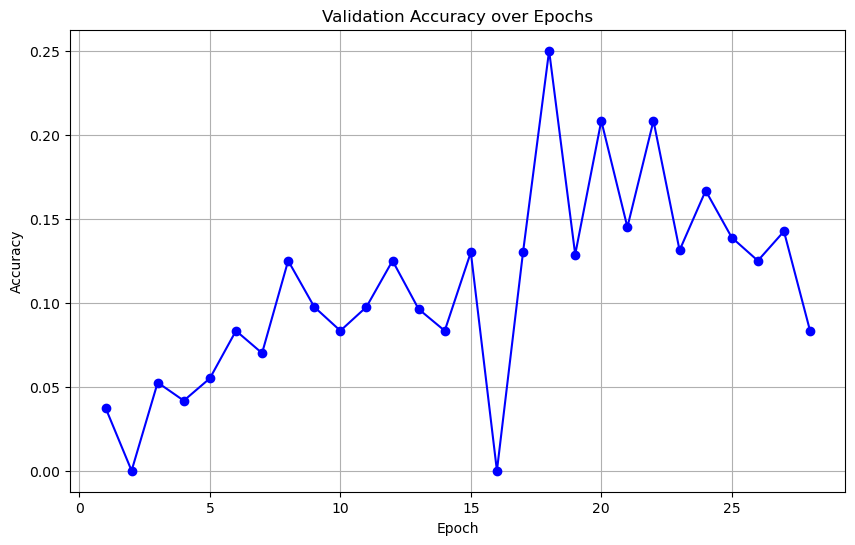

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(list(range(1, 29)), 
         [0.0375, 0.0, 0.0525, 0.0417, 0.0550, 0.0833, 0.0700, 0.1250, 0.0975, 0.0833, 0.0975, 0.1250, 0.0962, 0.0833, 0.1300, 0.0, 0.1300, 0.2500, 0.1287, 0.2083, 0.1450, 0.2083, 0.1312, 0.1667, 0.1388, 0.1250, 0.1425, 0.0833], 
         marker='o', color='b')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Validation Precision over Epochs


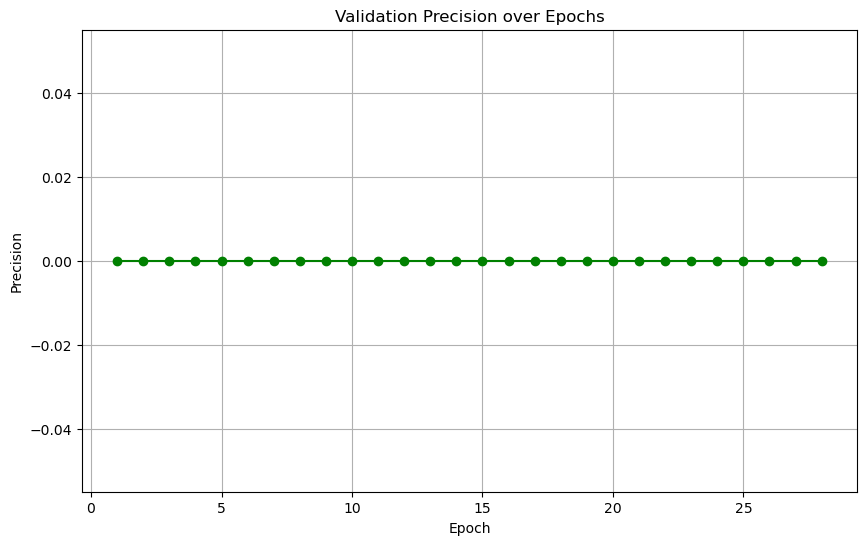

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(1, 29)), [0.0] * 28, marker='o', color='g')
plt.title('Validation Precision over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


Validation Recall over Epochs


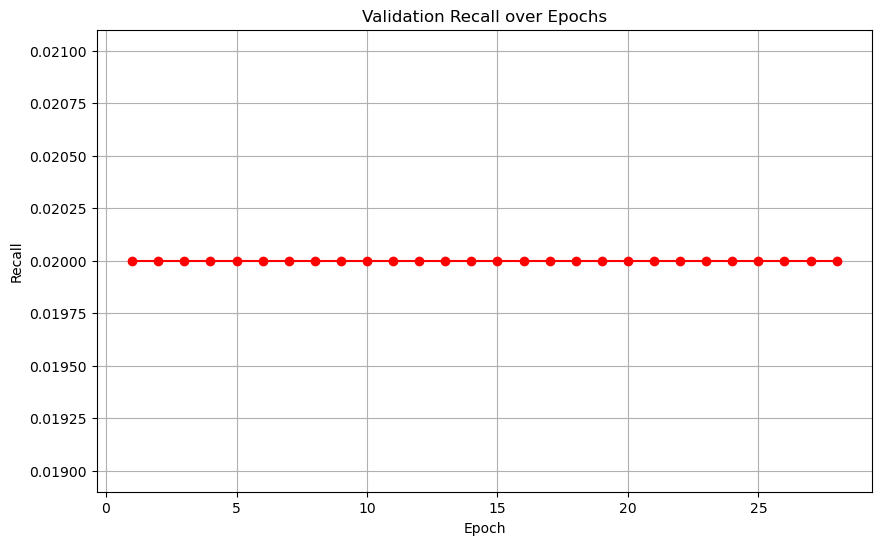

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(1, 29)), [0.02] * 28, marker='o', color='r')
plt.title('Validation Recall over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.grid(True)
plt.show()


Validation F1 Score over Epochs


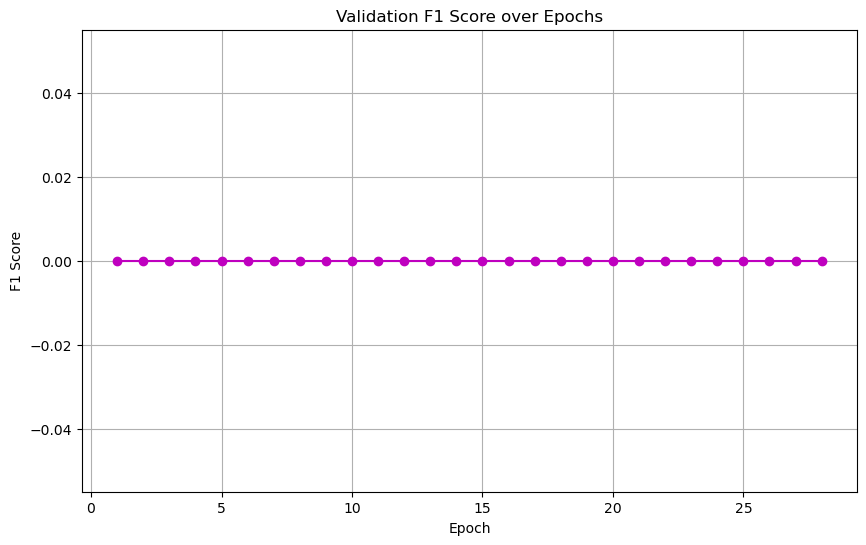

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(1, 29)), [0.0] * 28, marker='o', color='m')
plt.title('Validation F1 Score over Epochs')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()
